In [36]:
import requests
import json
import pandas as pd
from datetime import datetime, timezone
import numpy as np
import pytz

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


In [44]:
df = pd.read_csv('data_ENE00933_R.csv')
df

,DataDate,PM2_5,PM10,Temp,Hum
0,01/10/2023 5:30,7.0,7.0,22.2,99.74
1,01/10/2023 5:31,7.0,7.0,22.2,99.19
2,01/10/2023 5:32,6.0,6.0,22.2,99.87
3,01/10/2023 5:34,6.0,6.0,22.2,99.43
4,01/10/2023 5:35,6.0,7.0,22.2,99.49
...,...,...,...,...,...
188770,29/02/2024 5:25,4.0,4.0,22.1,96.00
188771,29/02/2024 5:26,6.0,6.0,22.1,96.00
188772,29/02/2024 5:27,5.0,6.0,22.1,95.00
188773,29/02/2024 5:28,4.0,4.0,22.1,96.00


In [ ]:
def process_data_and_post(df):
    # URL of your Flask API
    # url = 'http://127.0.0.1:5000/calibration-engine-api/PM25/v1/'  
    url = "https://calibration-engine-api.onrender.com/PM25/v1/"
    
    # Convert DataFrame to JSON
    json_data = df.to_json()

    # Make a POST request to the API
    response = requests.post(url, json=json_data)

    # Check the response
    if response.status_code == 200:
        json_data = response.json()
        df = pd.DataFrame(json_data)
        return df
    else:
        print("Error:", response.status_code, response.text)

In [48]:
df_new = process_data_and_post(df)
df_new

,DataDate,PM2_5,PM10,Temp,Hum,calibrated_PM2_5
0,01/10/2023 5:30,7.0,7.0,22.2,99.74,46.8010
1,01/10/2023 5:31,7.0,7.0,22.2,99.19,47.6535
2,01/10/2023 5:32,6.0,6.0,22.2,99.87,44.1895
3,01/10/2023 5:34,6.0,6.0,22.2,99.43,44.8715
4,01/10/2023 5:35,6.0,7.0,22.2,99.49,44.7785
...,...,...,...,...,...,...
188770,29/02/2024 5:25,4.0,4.0,22.1,96.00,46.0340
188771,29/02/2024 5:26,6.0,6.0,22.1,96.00,50.8540
188772,29/02/2024 5:27,5.0,6.0,22.1,95.00,49.9940
188773,29/02/2024 5:28,4.0,4.0,22.1,96.00,46.0340


In [40]:
# Assuming 'data' is your DataFrame
correlation = df_new['PM2_5'].corr(df_new['calibrated_PM2_5'])
print(f"Correlation between calibrated_PM2_5 and PM2.5: {correlation}")

# Calculate R-squared from correlation
r_squared = correlation ** 2
print("R-squared:", r_squared)

Correlation between calibrated_PM2_5 and PM2.5: 0.910559469213697
R-squared: 0.8291185469747296


In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Sample data
data = {
    'Sensor': ['Sensor_001', 'Sensor_002', 'Sensor_003', 'FEM (T640)'],
    'Mean': [20, 15, 10, 5],
    'SD': [5, 3, 2, 1],
    'Median': [19, 14, 9, 4]
}

df = pd.DataFrame(data)


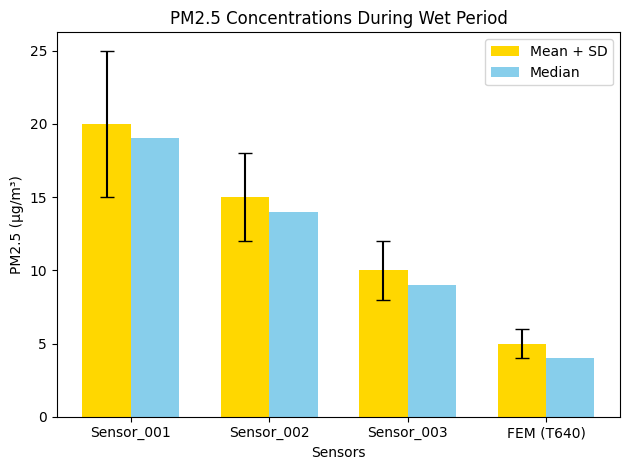

In [50]:
# Setting the positions and width for the bars
positions = np.arange(len(df['Sensor']))
width = 0.35  # the width of the bars

fig, ax = plt.subplots()

# Plotting the mean and SD
mean_bars = ax.bar(positions - width/2, df['Mean'], width, label='Mean + SD', 
                   color='gold', yerr=df['SD'], capsize=5)

# Plotting the median
median_bars = ax.bar(positions + width/2, df['Median'], width, label='Median', 
                     color='skyblue')

# Adding some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Sensors')
ax.set_ylabel('PM2.5 (µg/m³)')
ax.set_title('PM2.5 Concentrations During Wet Period')
ax.set_xticks(positions)
ax.set_xticklabels(df['Sensor'])
ax.legend()

# Adding a slight layout tweak to accommodate the x-axis labels
fig.tight_layout()

# Show the plot
plt.show()
